In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas_profiling
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
data=pd.read_csv('C:/Users/Lenovo/Desktop/4. Segmentation of Credit Card Customers/CC_GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
#Exploratory Data Analysis

In [5]:
#Only CUST_ID is categorical variable
#Other variables are continuous variables
cont_var=data.select_dtypes(['int64','float64'])
cat_var=data.select_dtypes('O')

In [6]:
def cont_var_summary(x):
    N=x.count()
    Nmiss=x.isna().sum()
    Sum=x.sum()
    Mean=x.mean()
    Median=x.median()
    Std=x.std()
    Var=x.var()
    Min=x.min()
    P1=x.quantile(0.01)
    P5=x.quantile(0.05)
    P10=x.quantile(0.10)
    P25=x.quantile(0.25)
    P50=x.quantile(0.50)
    P75=x.quantile(0.75)
    P90=x.quantile(0.90)
    P95=x.quantile(0.95)
    P99=x.quantile(0.99)
    Max=x.max()
    return pd.Series([N,Nmiss,Sum,Mean,Median,Std,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max],
                     index=['N','NMISS','SUM','MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99','MAX'])

In [7]:
print(cont_var.apply(cont_var_summary))

             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
N       8.950000e+03        8950.000000  8.950000e+03      8.950000e+03   
NMISS   0.000000e+00           0.000000  0.000000e+00      0.000000e+00   
SUM     1.400205e+07        7851.572994  8.978683e+06      5.302314e+06   
MEAN    1.564475e+03           0.877271  1.003205e+03      5.924374e+02   
MEDIAN  8.733852e+02           1.000000  3.612800e+02      3.800000e+01   
STD     2.081532e+03           0.236904  2.136635e+03      1.659888e+03   
VAR     4.332775e+06           0.056124  4.565208e+06      2.755228e+06   
MIN     0.000000e+00           0.000000  0.000000e+00      0.000000e+00   
P1      6.510059e-02           0.090909  0.000000e+00      0.000000e+00   
P5      8.814518e+00           0.272727  0.000000e+00      0.000000e+00   
P10     2.357553e+01           0.454545  0.000000e+00      0.000000e+00   
P25     1.282819e+02           0.888889  3.963500e+01      0.000000e+00   
P50     8.733852e+02     

In [8]:
#Outlier Analysis
cont_var=cont_var.apply(lambda x: x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [9]:
#Missing Value Treatment
cont_var.isna().sum()
cat_var.isna().sum()
percent_missing_min_payments=((data.shape[0]-data.MINIMUM_PAYMENTS.count())/data.shape[0])*100
percent_missing_min_payments
cont_var=cont_var.apply(lambda x: x.fillna(round(x.mean(),2)))
data=cont_var

In [10]:
data['LIMIT_RATIO']=data.BALANCE/data.CREDIT_LIMIT

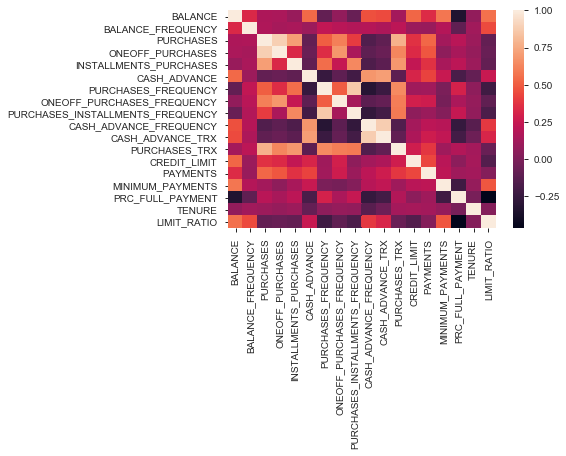

In [12]:
#Correlation among variables
sns.heatmap(data.corr())
plt.show()

In [13]:
#CLustering with KMeans

In [14]:
#Standardize the data

In [15]:
data_scaled=pd.DataFrame(StandardScaler().fit_transform(data))
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
0     8950 non-null float64
1     8950 non-null float64
2     8950 non-null float64
3     8950 non-null float64
4     8950 non-null float64
5     8950 non-null float64
6     8950 non-null float64
7     8950 non-null float64
8     8950 non-null float64
9     8950 non-null float64
10    8950 non-null float64
11    8950 non-null float64
12    8950 non-null float64
13    8950 non-null float64
14    8950 non-null float64
15    8950 non-null float64
16    8950 non-null float64
17    8950 non-null float64
dtypes: float64(18)
memory usage: 1.2 MB


In [16]:
#Variable Reduction - PCA or FA

In [17]:
pc=PCA(n_components=18)
pc.fit(data_scaled)
ei=pc.explained_variance_ #Eigen Values
ei

array([5.01923224, 4.01936868, 1.70396481, 1.3604688 , 1.12302799,
       0.93939123, 0.78258446, 0.69018006, 0.57578132, 0.44312294,
       0.31499844, 0.30480655, 0.23775821, 0.19964729, 0.12888861,
       0.10485475, 0.04134241, 0.0125926 ])

In [18]:
cum_var=np.cumsum(np.round(pc.explained_variance_ratio_,4)*100)
cum_var

array([ 27.88,  50.21,  59.68,  67.24,  73.48,  78.7 ,  83.05,  86.88,
        90.08,  92.54,  94.29,  95.98,  97.3 ,  98.41,  99.13,  99.71,
        99.94, 100.01])

In [19]:
ei_var=pd.DataFrame([ei,cum_var]).T
ei_var.columns=['Eigen Value','Cumulative Variance']
ei_var

,Eigen Value,Cumulative Variance
0,5.019232,27.88
1,4.019369,50.21
2,1.703965,59.68
3,1.360469,67.24
4,1.123028,73.48
5,0.939391,78.70
6,0.782584,83.05
7,0.690180,86.88
8,0.575781,90.08
9,0.443123,92.54


In [20]:
pc_final=PCA(n_components=5).fit(data_scaled)
reduced_comp=pc_final.fit_transform(data_scaled)
dimensions=pd.DataFrame(reduced_comp)
dimensions.columns=['C1','C2','C3','C4','C5']
dimensions.head()

,C1,C2,C3,C4,C5
0,-1.557584,-1.786711,-0.064941,0.587904,0.266822
1,-1.718629,2.386658,-1.409917,-0.311277,1.116236
2,1.054301,-0.188561,0.087863,1.846211,-0.735119
3,-0.737135,-0.379750,-0.979401,1.639042,0.727180
4,-1.728838,-0.798517,0.897798,1.222711,-0.228345


In [21]:
#Getting loadings with PCA

In [22]:
Loadings=pd.DataFrame((pc_final.components_.T*np.sqrt(pc_final.explained_variance_)).T,columns=data.columns).T
Loadings

,0,1,2,3,4
BALANCE,0.064755,0.844753,0.161426,0.115869,0.197396
BALANCE_FREQUENCY,0.217148,0.388411,0.505287,0.006157,-0.302659
PURCHASES,0.894155,0.177177,-0.118132,0.172604,-0.085701
ONEOFF_PURCHASES,0.741590,0.189870,-0.258660,0.408691,-0.249632
INSTALLMENTS_PURCHASES,0.754042,0.061372,0.158769,-0.291714,0.187571
CASH_ADVANCE,-0.209313,0.760246,-0.298584,-0.296097,0.037340
PURCHASES_FREQUENCY,0.777681,-0.184502,0.262795,-0.335229,-0.098230
ONEOFF_PURCHASES_FREQUENCY,0.674621,0.089227,-0.165881,0.341125,-0.387216
PURCHASES_INSTALLMENTS_FREQUENCY,0.663270,-0.177453,0.369728,-0.540441,0.101195
CASH_ADVANCE_FREQUENCY,-0.319305,0.754119,-0.162342,-0.300629,-0.258625


In [23]:
Loadings.to_csv('C:/Users/Lenovo/Desktop/4. Segmentation of Credit Card Customers/pca_loadings.csv')

In [24]:
#Segmentation - K-means

In [25]:
km_3=KMeans(n_clusters=3,random_state=120293).fit(dimensions)
km_4=KMeans(n_clusters=4,random_state=120293).fit(dimensions)
km_5=KMeans(n_clusters=5,random_state=120293).fit(dimensions)
km_6=KMeans(n_clusters=6,random_state=120293).fit(dimensions)
km_7=KMeans(n_clusters=7,random_state=120293).fit(dimensions)
km_8=KMeans(n_clusters=8,random_state=120293).fit(dimensions)
data['cluster_3']=km_3.labels_
data['cluster_4']=km_4.labels_
data['cluster_5']=km_5.labels_
data['cluster_6']=km_6.labels_
data['cluster_7']=km_7.labels_
data['cluster_8']=km_8.labels_

In [26]:
#Evaluation - Quantitaive - Percentage in each cluster 5-40 %
#                           Silhouette Coefficient
#                           Elbow Analysis
#           - Qualitative - Profiling

In [27]:
data.cluster_3.value_counts()/len(data)

1    0.618436
2    0.240447
0    0.141117
Name: cluster_3, dtype: float64

In [28]:
data.cluster_4.value_counts()/len(data)

1    0.430503
0    0.323799
2    0.152291
3    0.093408
Name: cluster_4, dtype: float64

In [29]:
data.cluster_5.value_counts()/len(data)

2    0.297765
1    0.284804
0    0.219106
4    0.115866
3    0.082458
Name: cluster_5, dtype: float64

In [30]:
data.cluster_6.value_counts()/len(data)

1    0.289497
0    0.215642
3    0.204804
4    0.131285
5    0.115196
2    0.043575
Name: cluster_6, dtype: float64

In [31]:
data.cluster_7.value_counts()/len(data)

0    0.274525
4    0.190726
2    0.169609
6    0.121788
3    0.108492
5    0.090391
1    0.044469
Name: cluster_7, dtype: float64

In [32]:
data.cluster_8.value_counts()/len(data)

1    0.227151
6    0.178324
0    0.166704
3    0.119553
7    0.116201
4    0.082793
5    0.066704
2    0.042570
Name: cluster_8, dtype: float64

In [33]:
#Silhouette Coefficient

In [34]:
scores=[]
km_3_score=metrics.silhouette_score(data_scaled,km_3.labels_)
km_4_score=metrics.silhouette_score(data_scaled,km_4.labels_)
km_5_score=metrics.silhouette_score(data_scaled,km_5.labels_)
km_6_score=metrics.silhouette_score(data_scaled,km_6.labels_)
km_7_score=metrics.silhouette_score(data_scaled,km_7.labels_)
km_8_score=metrics.silhouette_score(data_scaled,km_8.labels_)
km_range=range(3,9)
scores=[km_3_score,km_4_score,km_5_score,km_6_score,km_7_score,km_8_score]
scores

[0.21584481981408435,
 0.17553467254271557,
 0.16865476818653352,
 0.17283417005653226,
 0.17658333400185047,
 0.16433552290319756]

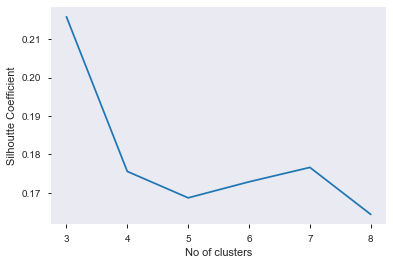

In [35]:
plt.plot(km_range,scores)
plt.xlabel('No of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.grid()
plt.show()

In [36]:
#Elbow Analysis

In [37]:
cluster_errors=[km_3.inertia_,km_4.inertia_,km_5.inertia_,km_6.inertia_,km_7.inertia_,km_8.inertia_]
cluster_errors

[69308.60085664604,
 57842.42335328315,
 50271.73369572118,
 45666.16368175716,
 42028.22477939004,
 38987.31718393957]

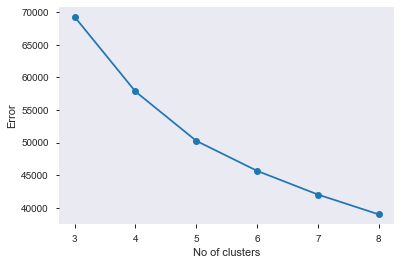

In [38]:
plt.plot(km_range,cluster_errors,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

In [39]:
#Qualitative Analysis - Profiling

In [40]:
type(data.cluster_3.value_counts())
size=pd.concat([pd.Series(len(data_scaled)),
          data.cluster_3.value_counts().sort_index(),
          data.cluster_4.value_counts().sort_index(),
          data.cluster_5.value_counts().sort_index(),
          data.cluster_6.value_counts().sort_index(),
          data.cluster_7.value_counts().sort_index(),
          data.cluster_8.value_counts().sort_index()])

In [41]:
seg_size=pd.DataFrame(size,columns=['seg_size'])
seg_pct=pd.DataFrame(size/len(data),columns=['seg_pct'])
seg_pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
seg_pct,1.0,0.141117,0.618436,0.240447,0.323799,0.430503,0.152291,0.093408,0.219106,0.284804,...,0.090391,0.121788,0.166704,0.227151,0.04257,0.119553,0.082793,0.066704,0.178324,0.116201


In [42]:
pd.concat([seg_size.T,seg_pct.T])

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
seg_size,8950.0,1263.000000,5535.000000,2152.000000,2898.000000,3853.000000,1363.000000,836.000000,1961.000000,2549.000000,...,809.000000,1090.000000,1492.000000,2033.000000,381.00000,1070.000000,741.000000,597.000000,1596.000000,1040.000000
seg_pct,1.0,0.141117,0.618436,0.240447,0.323799,0.430503,0.152291,0.093408,0.219106,0.284804,...,0.090391,0.121788,0.166704,0.227151,0.04257,0.119553,0.082793,0.066704,0.178324,0.116201


In [43]:
profiling_output=pd.concat([data.apply(lambda x: x.mean()),
           data.groupby('cluster_3').apply(lambda x: x.mean()).T,
           data.groupby('cluster_4').apply(lambda x: x.mean()).T,
           data.groupby('cluster_5').apply(lambda x: x.mean()).T,
           data.groupby('cluster_6').apply(lambda x: x.mean()).T,
           data.groupby('cluster_7').apply(lambda x: x.mean()).T,
           data.groupby('cluster_8').apply(lambda x: x.mean()).T],axis=1)
profiling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1541.046707,2225.258302,655.104620,3418.151821,627.649794,1046.990734,4230.266048,2599.917464,176.897681,737.519913,...,2471.322641,1067.522809,183.888570,1657.056732,3431.153301,1070.371212,2432.821831,5753.440099,157.102382,2123.445404
BALANCE_FREQUENCY,0.878083,0.980916,0.822260,0.961310,0.905349,0.803782,0.966400,0.982021,0.558373,0.957941,...,0.995202,0.966973,0.886253,0.985216,0.988976,0.966355,0.995007,0.974766,0.522408,0.932513
PURCHASES,936.229237,3830.114014,522.706302,301.411845,962.824565,283.466475,443.146764,4656.436256,350.558236,1109.818631,...,1056.015587,2223.111642,733.316173,258.866222,6400.742572,2256.820336,1117.840621,651.075745,306.698239,191.236269
ONEOFF_PURCHASES,536.493774,2365.400822,256.051147,184.421441,342.666729,237.482990,268.312442,3023.731196,242.099169,421.685641,...,257.426489,1602.895174,92.570932,212.824801,4107.623963,1619.989897,258.933414,404.633582,220.976159,140.695048
INSTALLMENTS_PURCHASES,384.498368,1355.087011,267.013774,117.037296,620.297671,46.207511,173.102723,1470.886593,108.780714,687.779268,...,787.803739,619.941313,640.567307,46.120580,1964.120596,636.279861,847.132098,242.721559,86.086585,50.574606
CASH_ADVANCE,935.920972,526.675808,241.237423,2962.849451,142.790764,555.766863,3928.953893,557.597117,284.369870,164.129556,...,615.355765,206.935810,51.863470,499.789198,664.667062,199.317030,625.183950,5492.552805,301.800454,2492.831476
PURCHASES_FREQUENCY,0.490351,0.939735,0.494555,0.215794,0.863280,0.186826,0.278807,0.941384,0.281031,0.906888,...,0.859012,0.884323,0.880965,0.188520,0.948604,0.888241,0.890525,0.329038,0.222642,0.161046
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.657061,0.141121,0.093414,0.202451,0.114484,0.124610,0.734857,0.103942,0.242548,...,0.133190,0.706548,0.058961,0.118558,0.764690,0.707618,0.129502,0.160999,0.096577,0.084889
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.737164,0.368134,0.136177,0.736033,0.071878,0.182639,0.721060,0.167832,0.770434,...,0.799556,0.505032,0.825848,0.073718,0.783421,0.513483,0.842167,0.223856,0.119661,0.079906
CASH_ADVANCE_FREQUENCY,0.134017,0.071208,0.051231,0.383806,0.033085,0.109053,0.457344,0.071805,0.036732,0.035985,...,0.106645,0.040041,0.012842,0.115148,0.077841,0.038375,0.107255,0.504120,0.037682,0.418172


In [44]:
profiling_output_final=pd.concat([seg_size.T,seg_pct.T,profiling_output])
profiling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
seg_size,8950.000000,1263.000000,5535.000000,2152.000000,2898.000000,3853.000000,1363.000000,836.000000,1961.000000,2549.000000,...,809.000000,1090.000000,1492.000000,2033.000000,381.000000,1070.000000,741.000000,597.000000,1596.000000,1040.000000
seg_pct,1.000000,0.141117,0.618436,0.240447,0.323799,0.430503,0.152291,0.093408,0.219106,0.284804,...,0.090391,0.121788,0.166704,0.227151,0.042570,0.119553,0.082793,0.066704,0.178324,0.116201
BALANCE,1541.046707,2225.258302,655.104620,3418.151821,627.649794,1046.990734,4230.266048,2599.917464,176.897681,737.519913,...,2471.322641,1067.522809,183.888570,1657.056732,3431.153301,1070.371212,2432.821831,5753.440099,157.102382,2123.445404
BALANCE_FREQUENCY,0.878083,0.980916,0.822260,0.961310,0.905349,0.803782,0.966400,0.982021,0.558373,0.957941,...,0.995202,0.966973,0.886253,0.985216,0.988976,0.966355,0.995007,0.974766,0.522408,0.932513
PURCHASES,936.229237,3830.114014,522.706302,301.411845,962.824565,283.466475,443.146764,4656.436256,350.558236,1109.818631,...,1056.015587,2223.111642,733.316173,258.866222,6400.742572,2256.820336,1117.840621,651.075745,306.698239,191.236269
ONEOFF_PURCHASES,536.493774,2365.400822,256.051147,184.421441,342.666729,237.482990,268.312442,3023.731196,242.099169,421.685641,...,257.426489,1602.895174,92.570932,212.824801,4107.623963,1619.989897,258.933414,404.633582,220.976159,140.695048
INSTALLMENTS_PURCHASES,384.498368,1355.087011,267.013774,117.037296,620.297671,46.207511,173.102723,1470.886593,108.780714,687.779268,...,787.803739,619.941313,640.567307,46.120580,1964.120596,636.279861,847.132098,242.721559,86.086585,50.574606
CASH_ADVANCE,935.920972,526.675808,241.237423,2962.849451,142.790764,555.766863,3928.953893,557.597117,284.369870,164.129556,...,615.355765,206.935810,51.863470,499.789198,664.667062,199.317030,625.183950,5492.552805,301.800454,2492.831476
PURCHASES_FREQUENCY,0.490351,0.939735,0.494555,0.215794,0.863280,0.186826,0.278807,0.941384,0.281031,0.906888,...,0.859012,0.884323,0.880965,0.188520,0.948604,0.888241,0.890525,0.329038,0.222642,0.161046
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.657061,0.141121,0.093414,0.202451,0.114484,0.124610,0.734857,0.103942,0.242548,...,0.133190,0.706548,0.058961,0.118558,0.764690,0.707618,0.129502,0.160999,0.096577,0.084889


In [45]:
profiling_output_final.to_csv('C:/Users/Lenovo/Desktop/4. Segmentation of Credit Card Customers/profiling_output.csv')